In [1]:
#pip install threadpoolctl==3.1.0 #incase k means dont work-fixed the problem.
#pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix    
from sklearn.metrics import classification_report       
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score   
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

    


In [3]:
df= pd.read_csv('C:/Users/91944/Downloads/Bank+Customer+Churn/Bank_Churn.csv')

In [4]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df_exclude = df.drop(['Surname','CustomerId','Exited'], axis=1)

In [7]:
df_exclude.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df_exclude.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df_exclude.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
from sklearn.preprocessing import LabelEncoder
convert_encoder = LabelEncoder()
df_exclude['GenderEncode']=convert_encoder.fit_transform(df_exclude['Gender'])
df_exclude=pd.get_dummies(df_exclude,columns=['Geography'],dtype='int',prefix='',prefix_sep='')
df_exclude.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
df_exclude=df_exclude.drop(['Gender'], axis=1)
df_exclude.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
#df_convert=df_exclude.astype(int)
df_convert=df_exclude.copy()

In [13]:
df_exclude.where(df_exclude['GenderEncode']==1).count()

CreditScore        5457
Age                5457
Tenure             5457
Balance            5457
NumOfProducts      5457
HasCrCard          5457
IsActiveMember     5457
EstimatedSalary    5457
GenderEncode       5457
France             5457
Germany            5457
Spain              5457
dtype: int64

In [14]:
df_convert.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
GenderEncode         int32
France               int32
Germany              int32
Spain                int32
dtype: object

In [15]:
df_exclude.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.545700,0.501400,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.497932,0.500023,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

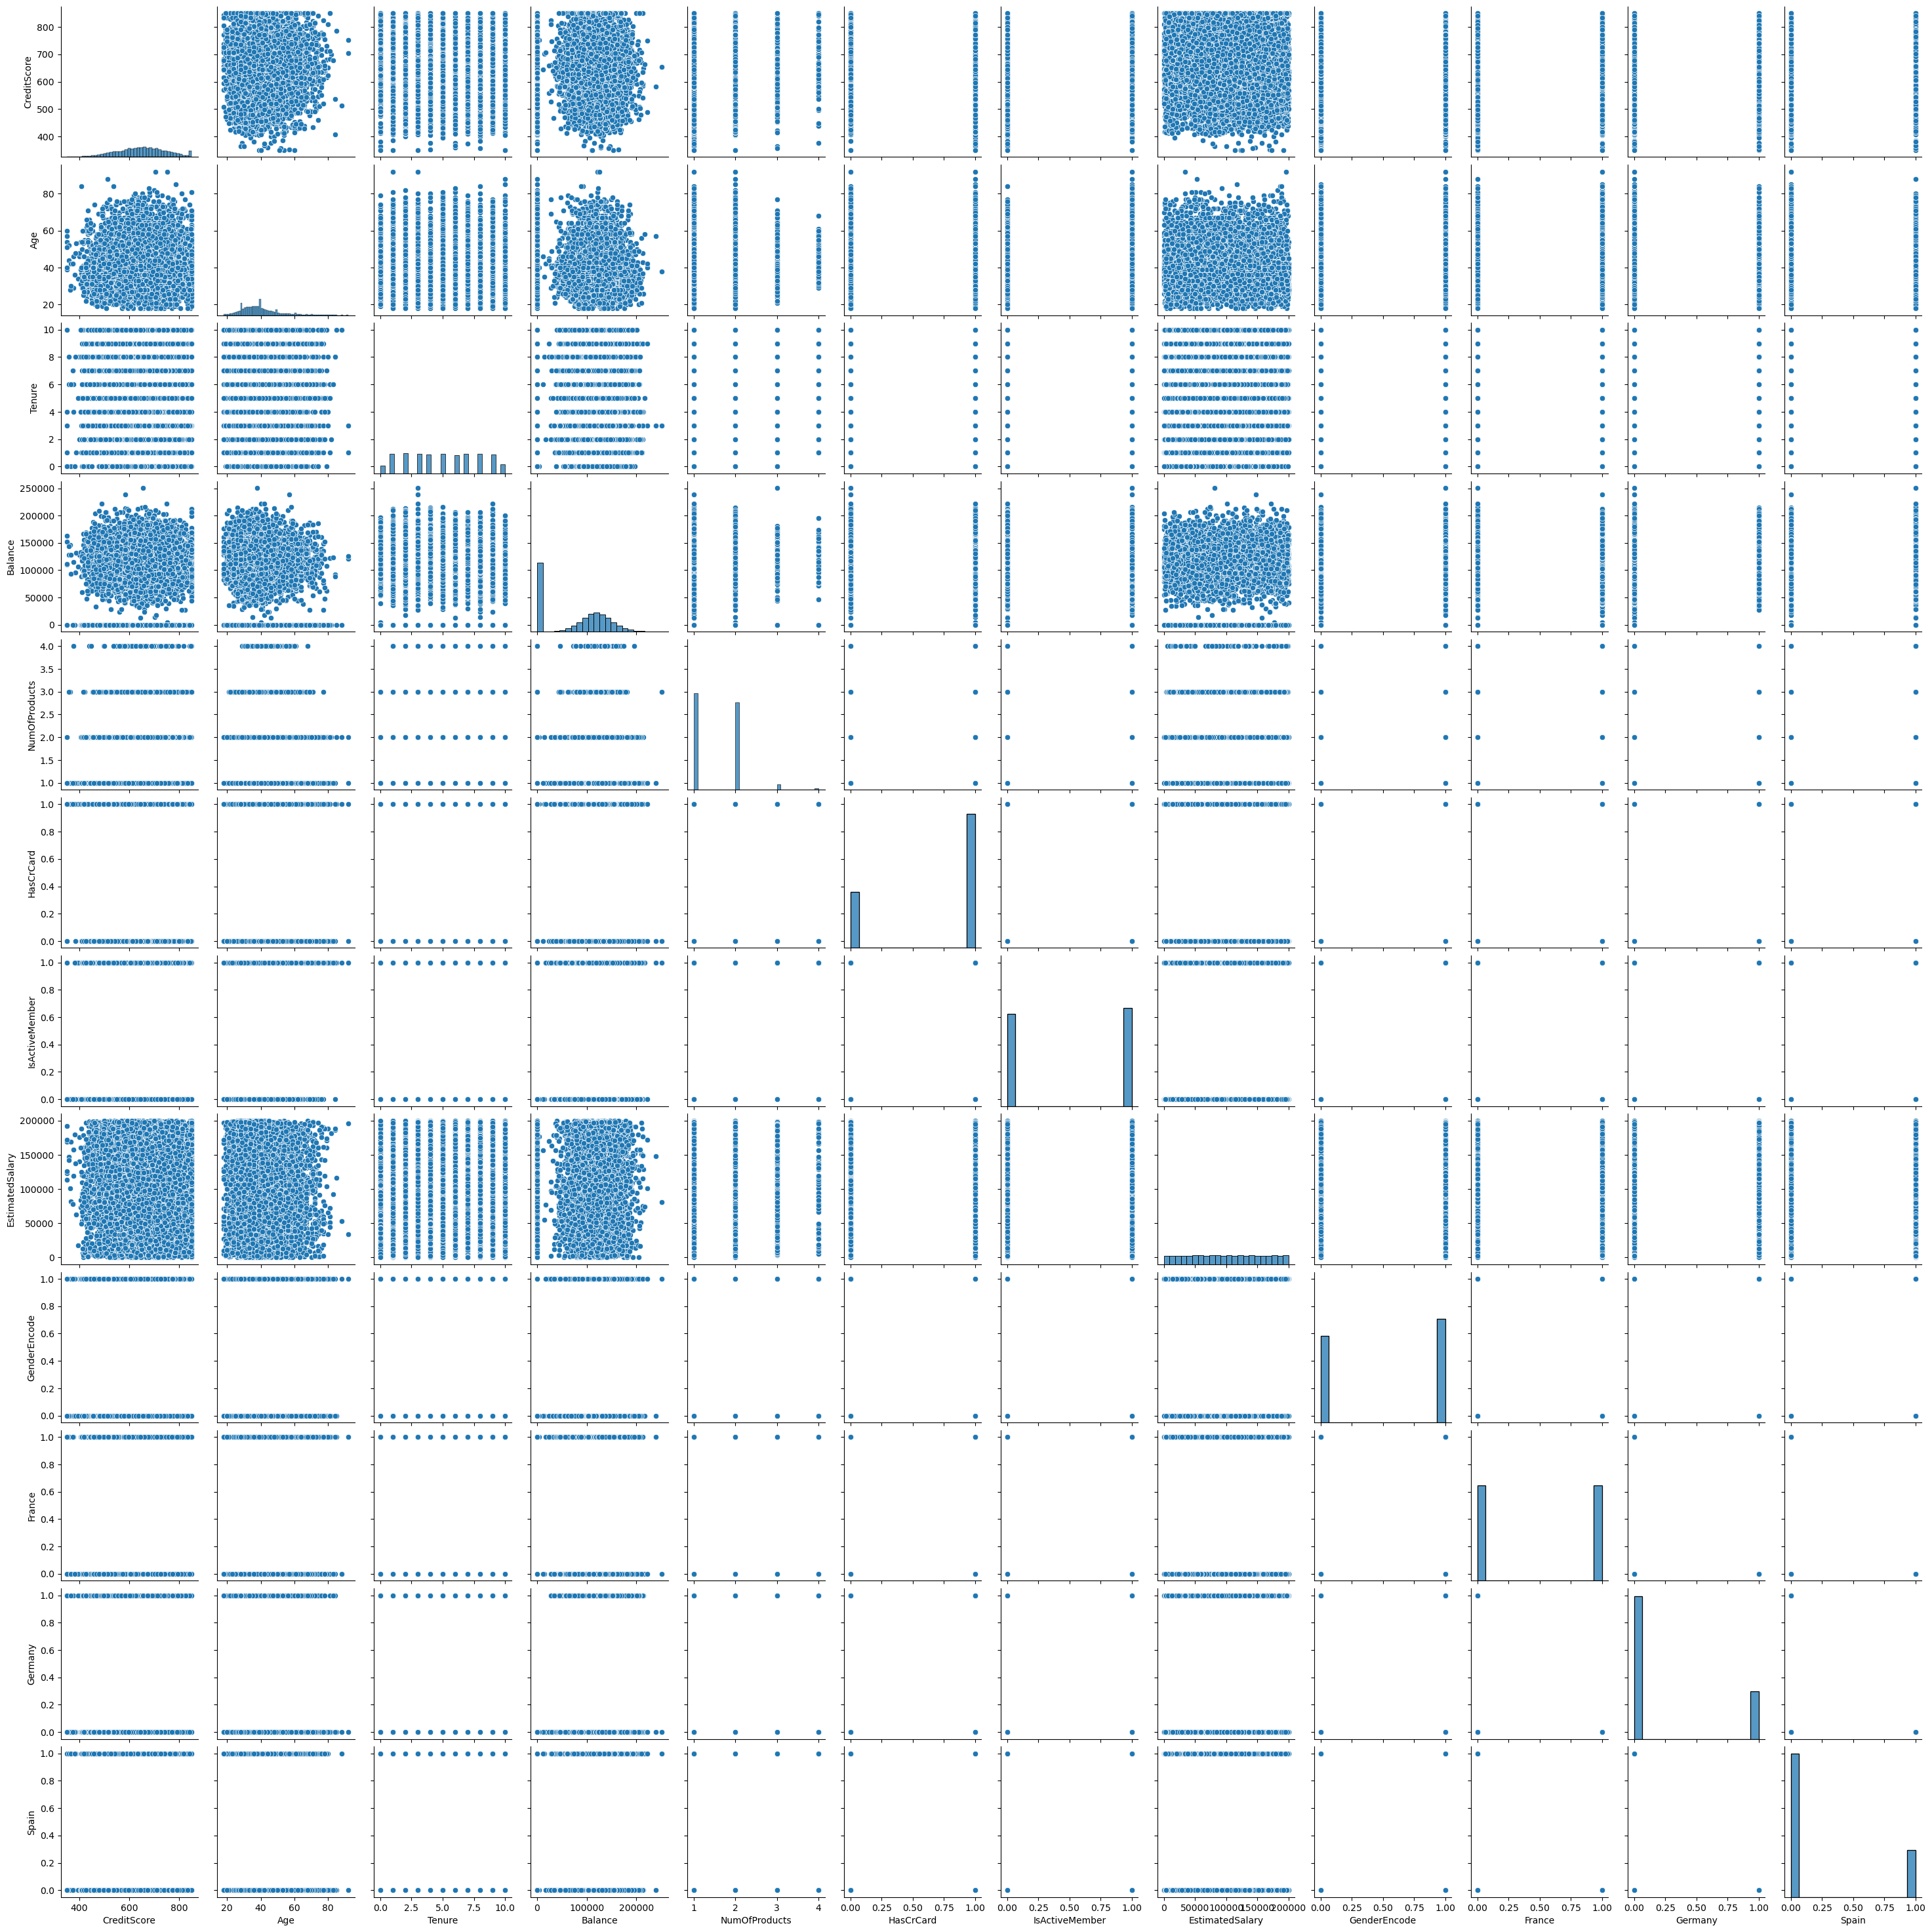

In [16]:
sns.pairplot(df_exclude)

In [17]:
df_convert['ProductsPerYear'] = df.apply(lambda row: row['NumOfProducts']/row['Tenure'] if row['Tenure']!= 0 else row['NumOfProducts'], axis=1)
#df_convert['ProductsPerYear'] = np.where(df_convert['Tenure']!=0, df_convert['NumOfProducts']/df_convert['Tenure'], df_convert['NumOfProducts'])

In [18]:
df_convert[0:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain,ProductsPerYear
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0,0.500
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1.000
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0,0.375
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,2.000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0.500


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
df_scaled= scaler.fit_transform(df_convert)
df_scaled_1= pd.DataFrame(df_scaled, columns=df_convert.columns)
df_scaled_1.head()





,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain,ProductsPerYear
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-1.002804,-0.578736,1.742740,-0.016781


In [20]:
df_scaled_1.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
GenderEncode       0
France             0
Germany            0
Spain              0
ProductsPerYear    0
dtype: int64

In [21]:
df_scaled_1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain,ProductsPerYear
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-5.258016e-17,-7.389644e-17,-2.877698e-17,1.314504e-16,2.096101e-17,-7.069900e-17,-4.689582e-17,1.957545e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-1.740268e+00,-1.095988e+00,-1.002804e+00,-5.787359e-01,-5.738092e-01,-8.043445e-01
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-8.535935e-01,-1.095988e+00,-1.002804e+00,-5.787359e-01,-5.738092e-01,-6.074535e-01
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,6.460917e-01,9.702426e-01,1.802807e-03,9.124191e-01,9.972039e-01,-5.787359e-01,-5.738092e-01,-3.449322e-01
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,6.460917e-01,9.702426e-01,8.572431e-01,9.124191e-01,9.972039e-01,1.727904e+00,-5.738092e-01,3.113709e-01
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,6.460917e-01,9.702426e-01,1.737200e+00,9.124191e-01,9.972039e-01,1.727904e+00,1.742740e+00,6.874403e+00


In [22]:
from sklearn.cluster import KMeans

In [23]:
inertia=[]
cluster_range= range(2,16)

for k in range(2,16):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(df_scaled_1)
    inertia.append(kmeans.inertia_)


[112768.33766274413, 98347.68370412737, 91149.5594526848, 85980.12099986113, 83315.31280456619, 80425.29724938812, 77875.326131814, 76215.06434921673, 74638.16629843868, 72580.78338424528, 71642.74359286697, 69920.01258160987, 69028.59906048703, 67248.80507837185]


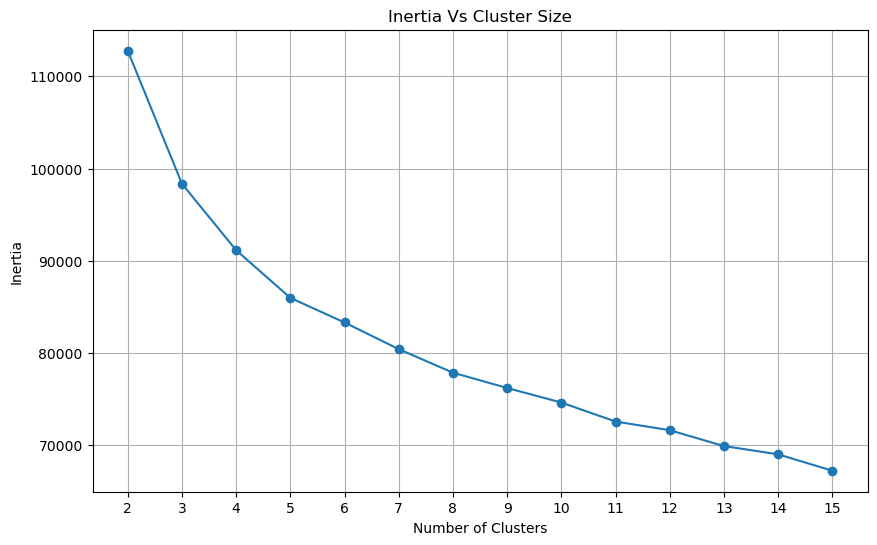

In [24]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range,inertia,marker='o')
plt.title('Inertia Vs Cluster Size')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [28]:
Kmeans5=KMeans(n_clusters=5,n_init=10,random_state=42)
Kmeans5.fit(df_scaled_1)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [30]:
from collections import Counter
Counter(Kmeans5.labels_)

Counter({1: 2342, 3: 2329, 0: 687, 2: 2336, 4: 2306})

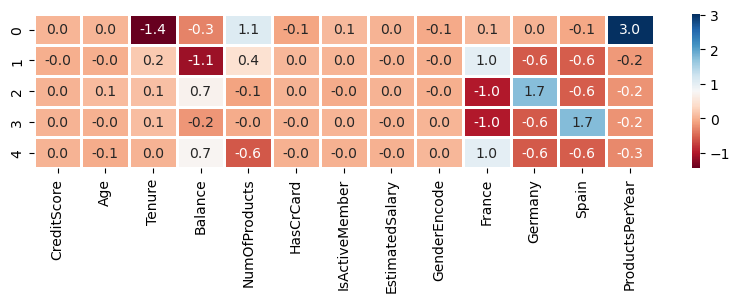

In [33]:
cluster_centers=pd.DataFrame(Kmeans5.cluster_centers_,columns=df_scaled_1.columns)
plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers,annot=True,cmap="RdBu",fmt=".1f",linewidth=2);


* 0 Many Products in a short time
* 1 French customers with more Products and low Balance
* 2 German customer with high balance and less Products
* 3 high Spanish Customer with neither
* 4 French Customers with high balance and few Products




In [45]:
df_exclude_2[df_exclude_2.Geography=='France'].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [42]:
df_exclude_2[df_exclude_2.Geography=='Germany'].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

In [43]:
df_exclude_2[df_exclude_2.Geography=='Spain'].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [75]:
df_scaled_2=df_scaled_1.drop(['Spain','Germany','France'],axis=1)

In [84]:
df_scaled_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,ProductsPerYear
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,-0.016781
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,0.967674
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,-0.262894
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,2.936584
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-0.016781


In [77]:
inertia1=[]
for i in range(2,16):
    kmeans=KMeans(n_clusters=i,n_init=10, random_state=42)
    kmeans.fit(df_scaled_2)
    inertia1.append(kmeans.inertia_)
print(inertia1)

[87638.72881549355, 79788.81535820315, 74389.54358342108, 70663.04473130705, 67596.82292310445, 64808.7292057046, 62624.762328485216, 60441.17024621819, 59031.910903385826, 57223.5217008903, 55900.026932582965, 54813.98779089316, 53629.692632391154, 52828.11948648521]


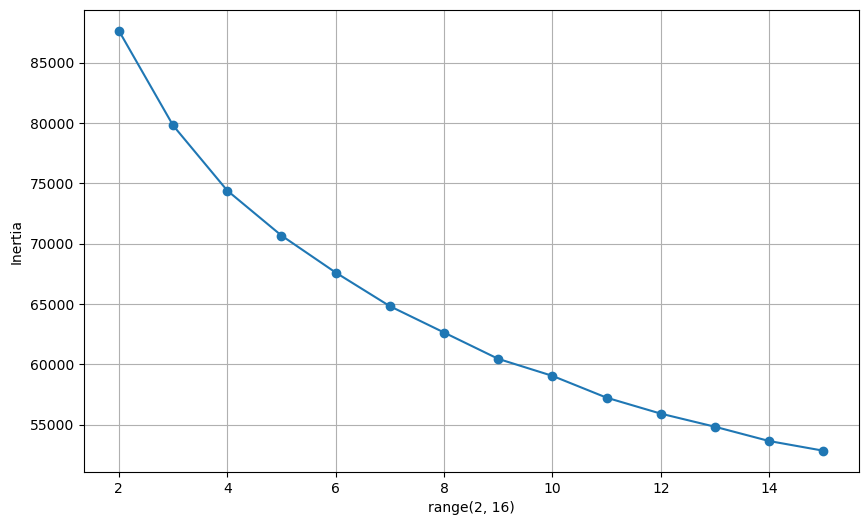

In [78]:
cluster_size=range(2,16)
plt.figure(figsize=(10,6))
plt.plot(cluster_size,inertia1,marker='o')
plt.xlabel('Cluster_size')
plt.ylabel('Inertia')
plt.xlabel(cluster_size)
plt.grid()
plt.show()

In [88]:
Kmeans4=KMeans(n_clusters=4,n_init=10,random_state=42)
Kmeans4.fit(df_scaled_2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [90]:
from collections import Counter
Counter(Kmeans4.labels_)

Counter({0: 2338, 3: 2136, 2: 3250, 1: 2276})

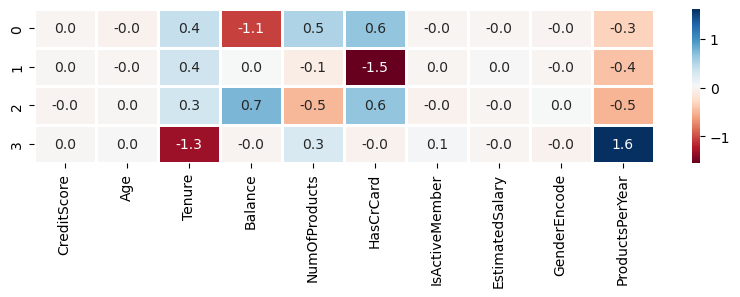

In [87]:
cluster_centers=pd.DataFrame(Kmeans4.cluster_centers_,columns=df_scaled_2.columns)
plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers,annot=True,cmap="RdBu",fmt=".1f",linewidth=2);

* 0 Don't have a credit card
* 1 High Balance, few products have a credit card
* 2 Low Balance, more products have a credit card
* 3 Many Products in a short amount of time

In [91]:
df_convert['Exited']=df.Exited

In [92]:
df_convert.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain,ProductsPerYear,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0,0.500,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1.000,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0,0.375,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,2.000,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0.500,0


In [103]:
data_final=pd.concat([df_convert,pd.Series(Kmeans4.labels_,name="Cluster")],axis=1)

In [104]:
data_final.groupby('Cluster').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,GenderEncode,France,Germany,Spain,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,
0,650.591531,38.542772,6.174080,10718.632947,1.829341,0.999572,0.512831,99657.165907,0.538067,0.628315,0.058169,0.313516,0.340544,0.164243
1,651.201230,38.917838,6.033392,78730.204165,1.480228,0.000000,0.515378,101285.720879,0.544376,0.500439,0.240334,0.259227,0.286305,0.209578
2,649.112615,39.020615,5.978769,123087.696920,1.244308,1.000000,0.496923,99816.928034,0.564615,0.421231,0.381538,0.197231,0.249520,0.226462
3,651.898408,39.190543,1.184457,75174.985665,1.691011,0.687266,0.544944,99706.286559,0.526685,0.485487,0.274345,0.240169,1.323252,0.205993


* 0 Low Balance, more Products, have a credit card
* 1 Don't have a credit card
* 2 High Balance, few Products have a credit card
* 3 Many Products in short tenure.